In [34]:
from statsmodels.tsa.stattools import acf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
import ta
def indicator_fill(df):
    a = ta.trend.ema_indicator(close=df.trade_price,window=5)
    f = ta.trend.sma_indicator(close=df.trade_price,window=50)
    i = ta.trend.sma_indicator(close=df.trade_price,window=20)
    df["5_EMA"] = a
    df["50_SMA"] = f
    df["20_SMA"] = i
    return df
df = pd.read_csv('correlation_test.csv')
df = indicator_fill(df)
df = df[20:]
df['ma_diff'] = df['5_EMA'] - df['20_SMA']
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
from pandas.plotting import autocorrelation_plot

df.head()

,trade_price,trade_qty,dollar_val,top_bid,top_ask,weight,signed_dollar_val,5_EMA,50_SMA,20_SMA,ma_diff
20,30739.14,0.001,30.73914,30739.14,30739.15,-1,-30.73914,30738.753255,NaN,30736.8240,1.929255
21,30739.15,0.012,368.86980,30739.14,30739.15,1,368.86980,30738.885503,NaN,30736.9955,1.890003
22,30740.72,0.274,8422.95728,30739.14,30739.15,1,8422.95728,30739.497002,NaN,30737.2705,2.226502
23,30740.71,0.001,30.74071,30740.71,30740.72,-1,-30.74071,30739.901335,NaN,30737.5450,2.356335
24,30740.71,0.002,61.48142,30740.71,30740.72,-1,-61.48142,30740.170890,NaN,30737.8195,2.351390


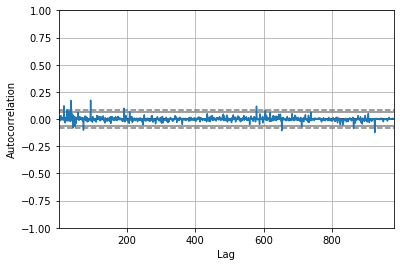

In [35]:
autocorrelation_plot(df.signed_dollar_val)

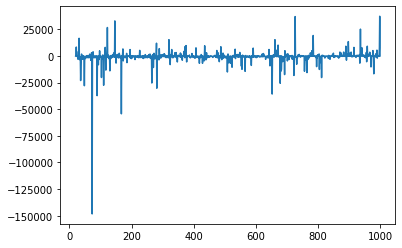

count       980.000000
mean       -692.194677
std        6865.129875
min     -148357.845000
25%        -952.857540
50%        -215.086480
75%         122.884140
max       37383.001600
Name: signed_dollar_val, dtype: float64

ADF Statistic: -30.860054
p-value: 0.000000

Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
20     -30.73914
21     368.86980
22    8422.95728
23     -30.74071
24     -61.48142
Name: signed_dollar_val, dtype: float64


In [36]:
import numpy as np

pyplot.plot(df.signed_dollar_val)
pyplot.show()
print(df.signed_dollar_val.describe())
result = adfuller(df.signed_dollar_val)
print('\nADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

print(df.signed_dollar_val.head())

In [71]:
df = pd.read_csv('check.csv')
print(df.head())
result = adfuller(df.ma_diff)
print('\nADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

        Ask       Ask_Pct       std  atr_volatility  50_tick_return  \
0  3640.264  2.470000e-06  0.000039           1.557        0.000017   
1  3640.254 -2.750000e-06  0.000038           1.557       -0.000056   
2  3640.464  5.770000e-05  0.000038           1.557        0.000057   
3  3640.267 -5.410000e-05  0.000039           1.557        0.000002   
4  3640.264 -8.240000e-07  0.000038           1.557        0.000058   

   past_max_val  past_min_val  buy_take_profit  sell_take_profit  buy_stop  \
0      3641.058      3639.501         3643.378          3637.150  3637.944   
1      3641.058      3639.501         3643.368          3637.140  3637.944   
2      3641.058      3639.501         3643.578          3637.350  3637.944   
3      3641.058      3639.501         3643.381          3637.153  3637.944   
4      3641.058      3639.501         3643.378          3637.150  3637.944   

   ...  up_move  down_move  profit_pos  loss_pos  future_max_val  \
0  ...    2.510      0.000         1

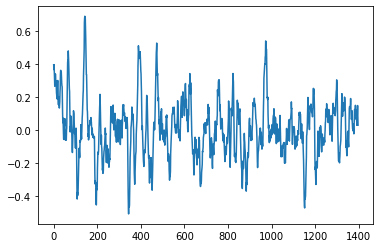

In [78]:
pyplot.plot(df.ma_diff)

C:\Users\91984\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([3079.95820868]), array([0.]), array([2988.64836207]), array([0.]))

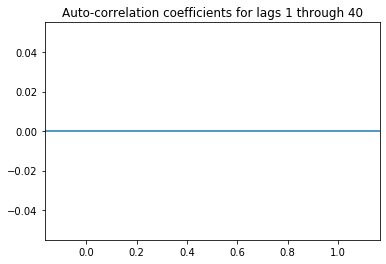

In [75]:
import statsmodels.stats.diagnostic as diag
import statsmodels.graphics.tsaplots as tsa
#diag.acorr_ljungbox(df['ma_diff'], lags=[100], boxpierce=True, model_df=0, period=None, return_df=None)
tsa.plot_acf(df['ma_diff'], lags=100, alpha=0.05, title='Auto-correlation coefficients for lags 1 through 40')

diag.acorr_ljungbox(df['ma_diff'].diff()[1:], lags=[100], boxpierce=True, model_df=0, period=None, return_df=None)

In [43]:
print(df.ma_diff[:300].describe())
print('\n------------------')
print(df.ma_diff[400:700].describe())

count    300.000000
mean      -0.109867
std        2.038369
min       -7.231666
25%       -0.934933
50%       -0.029520
75%        1.119213
max        3.537630
Name: ma_diff, dtype: float64

------------------
count    300.000000
mean      -0.507894
std        2.114320
min       -7.215332
25%       -1.184143
50%       -0.437137
75%        0.441621
max        6.096071
Name: ma_diff, dtype: float64


In [26]:
df = pd.read_csv('corr.csv')
print(df.head())
result = adfuller(df.top_bid)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(df.dollar_val.describe())

    top_bid  top_bid_qty   dollar_val
0  30735.77        0.388  11925.47876
1  30735.77        0.382  11741.06414
2  30735.72        0.001     30.73572
3  30735.57        0.001     30.73557
4  30735.22        0.163   5009.84086
ADF Statistic: -2.193665
p-value: 0.208553
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
count      1087.000000
mean     137867.310906
std      167981.991772
min          30.712360
25%       15133.811865
50%       79970.433230
75%      188691.569650
max      843429.870000
Name: dollar_val, dtype: float64


In [ ]:
model = ols('dollar_val ~ trade_qty', data = df).fit()
durbin_watson(model.resid)
acf(df.trade_price)

In [ ]:
acf(df.dollar_val)

In [ ]:
df = pd.read_csv('corr.csv')
df.head()
model = ols('top_bid ~ top_bid_qty', data = df).fit()
durbin_watson(model.resid)

In [ ]:
acf(df.top_bid)

In [ ]:
acf(df.dollar_val)

In [ ]:
import ta
def indicator_fill(df):
    a = ta.trend.ema_indicator(close=df.trade_price,window=5)
    f = ta.trend.sma_indicator(close=df.trade_price,window=50)
    i = ta.trend.sma_indicator(close=df.trade_price,window=20)
    df["5_EMA"] = a
    df["50_SMA"] = f
    df["20_SMA"] = i
    return df


In [ ]:
df = indicator_fill(df)
df = df[20:]
df['ma_diff'] = df['5_EMA'] - df['20_SMA']
df.head()

In [ ]:
acf(df.ma_diff)

In [ ]:
df.tail()